In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10

# Set global font size
plt.rcParams.update({'font.size': 14})  # Change the number to your desired font size
#plt.tight_layout(pad=10.0)  # Increase the padding

# Read the CSV file
#data = pd.read_csv("simulation_06242024/results_combined.csv")
data = pd.read_csv("/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/results_combined0122.csv")

# Get the default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Get the data with the default settings
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt the data for combined plotting
data_melted = pd.melt(data, id_vars=list(default_settings.keys()), value_vars=['SCGclust-silhouette',	'SCGclust-GT',	'SBMClone',	'Kmeans-CNA'],
                      var_name='Methods compared', value_name='V-measure')

# Setting up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']
#variables = ['cell', 'clone', 'snv', 'cna']

# Iterate over the variables to create boxplots
for i, var in enumerate(variables):
    
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette',	'SCGclust-GT',	'SBMClone',	'Kmeans-CNA'],
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    
    sns.boxplot(x=var, y='V-measure', 
                hue='Methods compared', 
                data=data_var, ax=axes[0, i])
    print(var)
    if var == 'varying # of snvs':
        var = 'varying # of SNVs'
    if var == 'varying # of cnas':
        var = 'varying # of CNAs'
    #axes[0, i].set_title(f'V-measure vs {var}')
    axes[0, i].set_xlabel(var)
    #axes[0, i].set_ylabel('Value')

# Remaining variables
remaining_vars = [col for col in data.columns if col not in variables + ['SCGclust-silhouette',	'SCGclust-GT',	'SBMClone',	'Kmeans-CNA','path', 'rep', 'run_time', 'best_epoch', 'missclassified']]

# Iterate over the remaining variables to create boxplots
for i, var in enumerate(remaining_vars):
    # print(data_var)
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette',	'SCGclust-GT',	'SBMClone',	'Kmeans-CNA'], 
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    # print(data_var)
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[1, i % 4])
#    axes[1, i % 4].set_title(f'V-measure vs {var}')
    # varying CNA noise level
    if var == 'varying cluster size (sd)':
        var = 'varying CNA noise level'
    axes[1, i % 4].set_xlabel(var)
#    axes[1, i % 4].set_ylabel('Value')

for ax in axes.flatten():
    ax.legend_.remove()

# Add legend for the second row
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Adjust layout to prevent overlap
plt.tight_layout(rect=[0, 0, 0, 0])  # Leave space for the legend on the top
#plt.tight_layout()

#plt.tight_layout()
plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_bp0122.pdf', format='pdf')
plt.show()

#TODO: REmove V-measure on the y axis except the two leftmost subfigures. Add a, b, c, d, e, f, g, h. 

KeyError: "The following id_vars or value_vars are not present in the DataFrame: ['SCGclust-gt']"

varying # of cells
varying # of clones
varying # of snvs
varying # of cnas


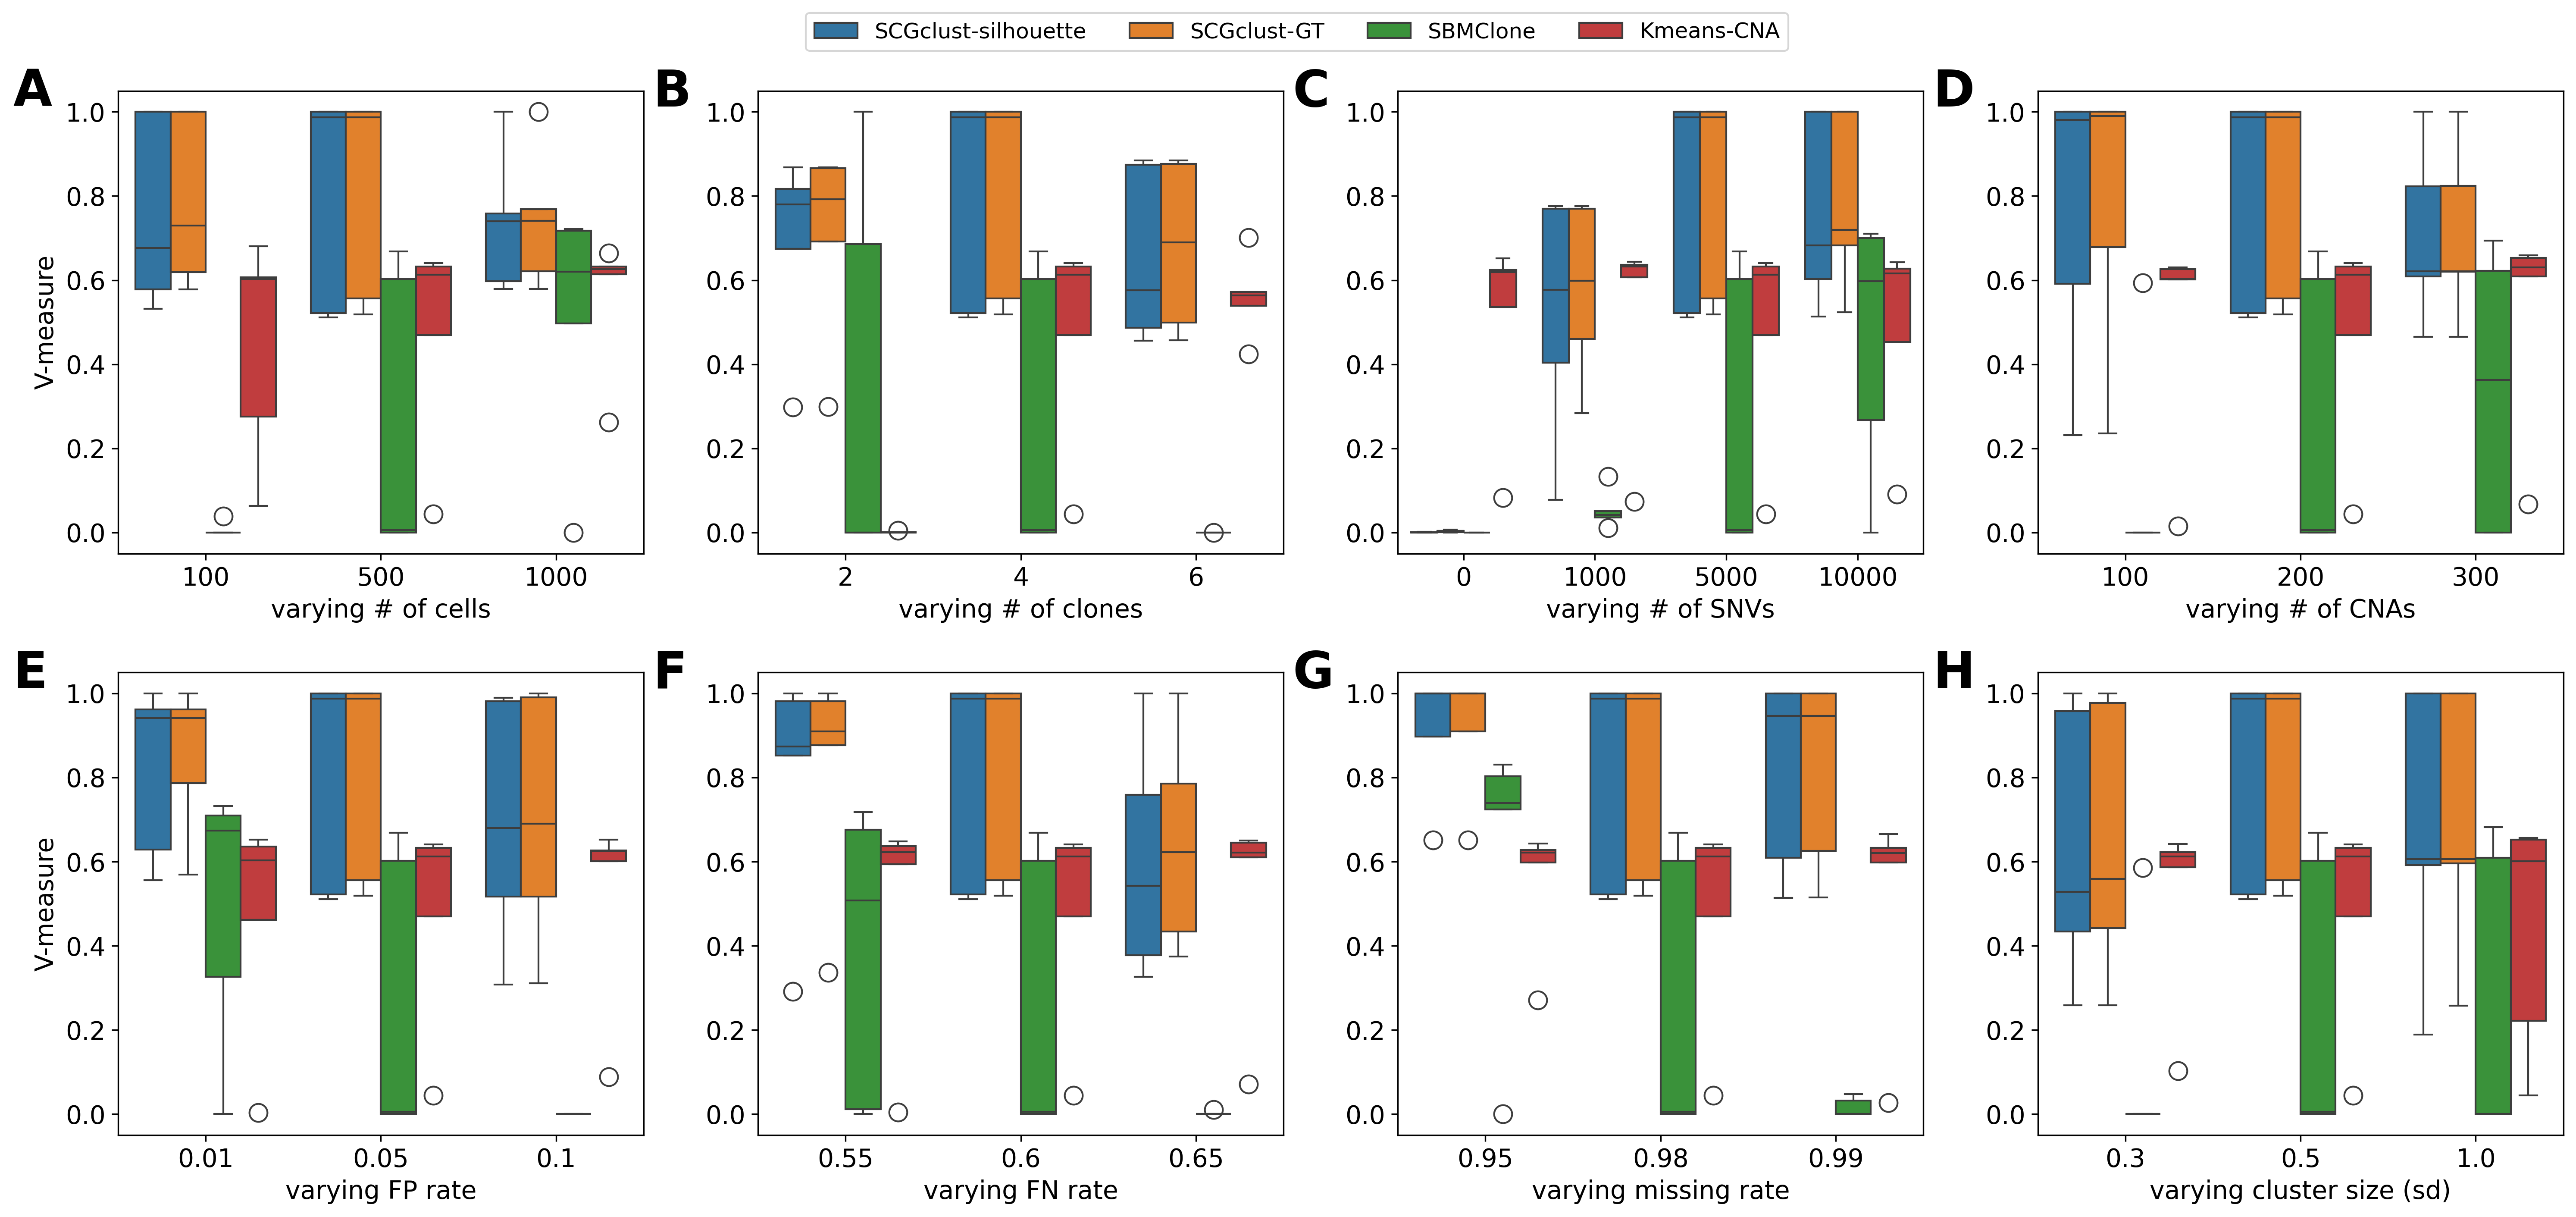

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10

# Set global font size
plt.rcParams.update({'font.size': 14})

# Read the CSV file
data = pd.read_csv("/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/results_combined0122.csv")

# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Data with default settings
data_default = data.copy()
for key, value in default_settings.items():
    data_default = data_default[data_default[key] == value]

# Melt the data for combined plotting
data_melted = pd.melt(data, id_vars=list(default_settings.keys()), value_vars=['SCGclust-silhouette', 'SCGclust-GT', 'SBMClone', 'Kmeans-CNA'],
                      var_name='Methods compared', value_name='V-measure')

# Set up the figure and axes
fig, axes = plt.subplots(2, 4, figsize=(20, 10))

# Variables to plot
variables = ['varying # of cells', 'varying # of clones', 'varying # of snvs', 'varying # of cnas']

# Subplot labels
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Iterate over the variables to create boxplots
for i, var in enumerate(variables):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette', 'SCGclust-GT', 'SBMClone', 'Kmeans-CNA'],
                                            var_name='Methods compared', 
                                            value_name='V-measure'), data_var])
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[0, i])
    print(var)
    if var == 'varying # of snvs':
        var = 'varying # of SNVs'
    if var == 'varying # of cnas':
        var = 'varying # of CNAs'
    axes[0, i].set_xlabel(var)
    if i != 0:  # Remove y-axis label except for the leftmost plot
        axes[0, i].set_ylabel('')
    axes[0, i].text(-0.2, 1.05, subplot_labels[i], transform=axes[0, i].transAxes, fontsize=28, fontweight='bold', va='top')

# Remaining variables
remaining_vars = [col for col in data.columns if col not in variables + ['SCGclust-silhouette', 'SCGclust-GT', 'SBMClone', 'Kmeans-CNA', 'path', 'rep', 'run_time', 'best_epoch', 'missclassified']]

for i, var in enumerate(remaining_vars):
    data_var = data_melted[data_melted[var] != default_settings[var]].copy()
    data_var = pd.concat([data_default.melt(id_vars=list(default_settings.keys()), 
                                            value_vars=['SCGclust-silhouette', 'SCGclust-GT', 'SBMClone', 'Kmeans-CNA'], 
                                            var_name='Methods compared', value_name='V-measure'), data_var])
    sns.boxplot(x=var, y='V-measure', hue='Methods compared', data=data_var, ax=axes[1, i % 4])
    axes[1, i % 4].set_xlabel(var)
    if i % 4 != 0:  # Remove y-axis label except for the leftmost plot in each row
        axes[1, i % 4].set_ylabel('')
    axes[1, i % 4].text(-0.2, 1.05, subplot_labels[4 + i], transform=axes[1, i % 4].transAxes, fontsize=28, fontweight='bold', va='top')

# Remove legends from individual subplots
for ax in axes.flatten():
    ax.legend_.remove()

# Add a single legend for the entire figure
handles, labels = axes[1, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=4, fontsize=12)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.92])  # Leave space for the legend on the top

# Save the figure
# plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_bp0122.pdf', format='pdf')
plt.show()

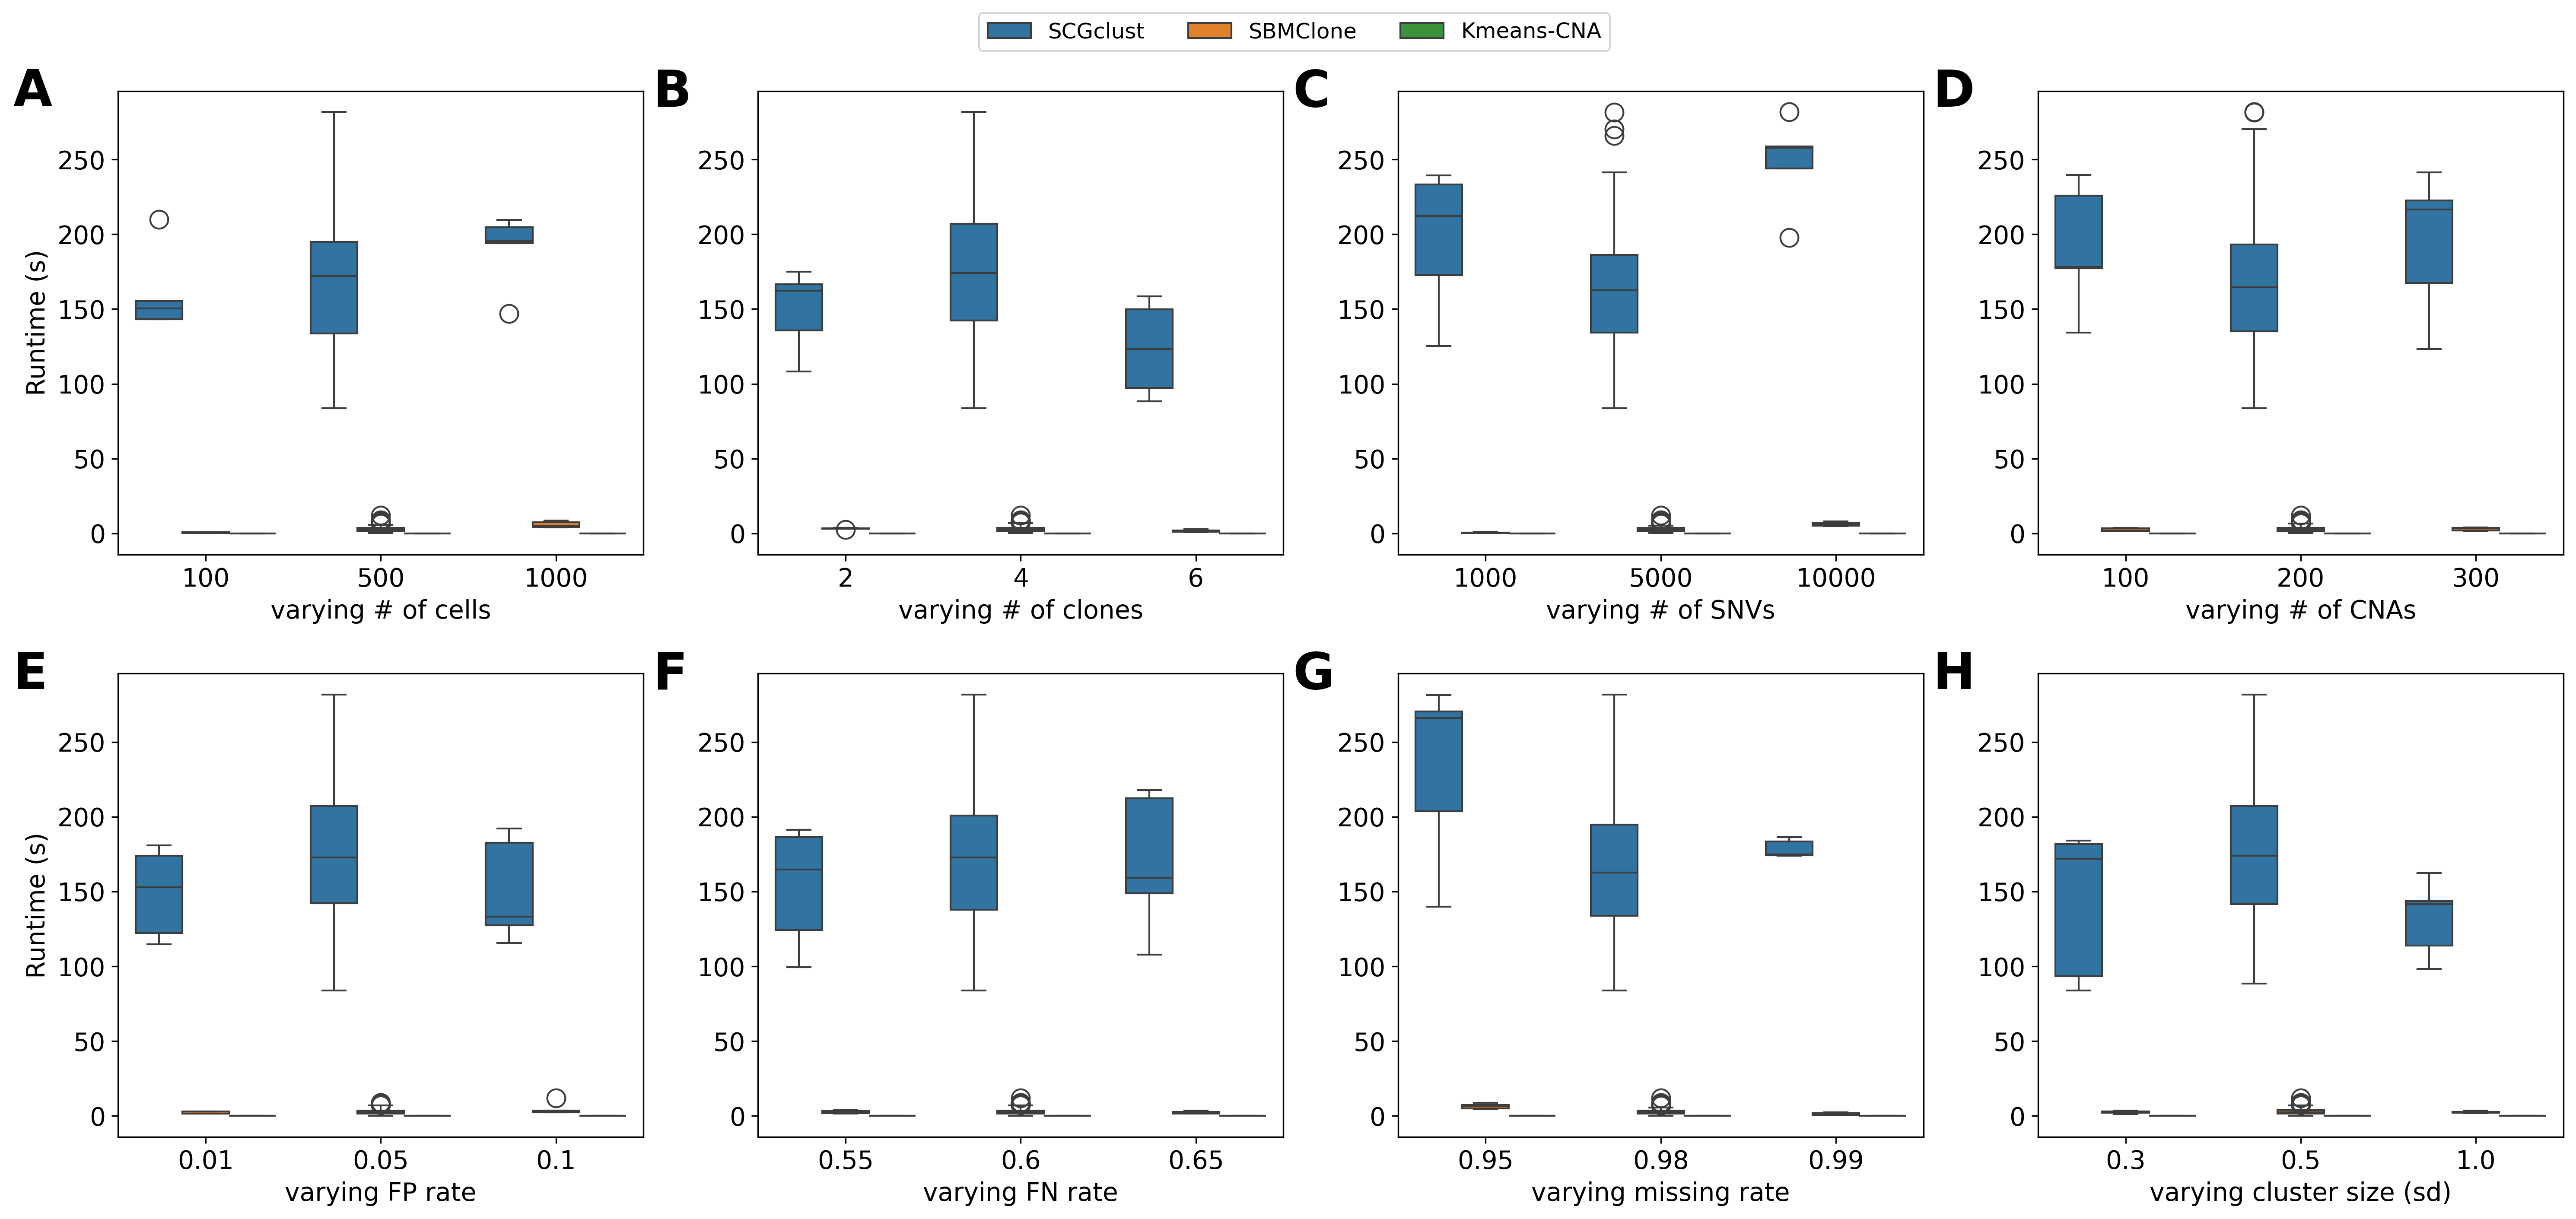

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize'] = (9.0, 9.0)
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
plt.rcParams['lines.markersize'] = 10
plt.rcParams.update({'font.size': 14})

# Read the CSV file
data = pd.read_csv("/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/results_combined0122_time.csv")

# Default settings
default_settings = {
    'varying # of clones': 4,
    'varying # of snvs': 5000,
    'varying # of cnas': 200,
    'varying # of cells': 500,
    'varying FP rate': 0.05,
    'varying FN rate': 0.6,
    'varying missing rate': 0.98,
    'varying cluster size (sd)': 0.5
}

# Melt runtime columns
runtime_melted = pd.melt(
    data,
    id_vars=list(default_settings.keys()),
    value_vars=['our_runtime', 'SBMClone_measure_runtime', 'km_measure_runtime'],
    var_name='Method',
    value_name='Runtime (s)'
)

# Rename methods for plotting
method_map = {
    'our_runtime': 'SCGclust',
    'SBMClone_measure_runtime': 'SBMClone',
    'km_measure_runtime': 'Kmeans-CNA'
}
runtime_melted['Method'] = runtime_melted['Method'].map(method_map)

# Variables to plot
variables = [
    'varying # of cells',
    'varying # of clones',
    'varying # of snvs',
    'varying # of cnas',
    'varying FP rate',
    'varying FN rate',
    'varying missing rate',
    'varying cluster size (sd)'
]

# Set up subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
subplot_labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

# Make boxplots
for i, var in enumerate(variables):
    ax = axes[i // 4, i % 4]
    sns.boxplot(x=var, y='Runtime (s)', hue='Method', data=runtime_melted, ax=ax)
    ax.set_xlabel(var.replace("snvs", "SNVs").replace("cnas", "CNAs"))
    
    # Add y-label only to leftmost plots
    if i % 4 == 0:
        ax.set_ylabel("Runtime (s)")
    else:
        ax.set_ylabel("")
    
    # Add subplot label
    ax.text(-0.2, 1.05, subplot_labels[i], transform=ax.transAxes,
            fontsize=28, fontweight='bold', va='top')
    
    # Remove duplicate legends
    if ax.get_legend() is not None:
        ax.get_legend().remove()

# Shared legend
handles, labels = axes[0, 0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 0.95), ncol=3, fontsize=12)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.savefig('/maiziezhou_lab/yunfei/Projects/cellClustering_GNN/results_for_plotting/simulated_data_runtime.pdf', format='pdf')
plt.show()
